In [21]:
import pandas as pd
from pandas import DataFrame
from pandas import read_csv, pivot_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [22]:
train = pd.read_csv('train.csv', index_col='id')
test = pd.read_csv('test.csv', index_col='id')
submission = pd.read_csv('submission.csv')
snp = pd.read_csv('snp_info.csv')
print(train.shape, test.shape, submission.shape)

(262, 20) (175, 19) (175, 2)


In [23]:
# 데이터 확인
print(train.head(3))
print(test.head(3))
print(submission.head(3))
print(snp.head(3))

           father  mother  gender  trait SNP_01 SNP_02 SNP_03 SNP_04 SNP_05  \
id                                                                            
TRAIN_000       0       0       0      2    G G    A G    A A    G A    C A   
TRAIN_001       0       0       0      2    A G    A G    C A    A A    A A   
TRAIN_002       0       0       0      2    G G    G G    A A    G A    C C   

          SNP_06 SNP_07 SNP_08 SNP_09 SNP_10 SNP_11 SNP_12 SNP_13 SNP_14  \
id                                                                         
TRAIN_000    A A    A A    G G    A A    G G    A G    A A    A A    A A   
TRAIN_001    A G    A A    G A    A A    A G    A A    G A    G G    A A   
TRAIN_002    G G    A A    G A    G A    A G    A A    A A    A A    A A   

          SNP_15 class  
id                      
TRAIN_000    A A     B  
TRAIN_001    A A     C  
TRAIN_002    A A     B  
          father  mother  gender  trait SNP_01 SNP_02 SNP_03 SNP_04 SNP_05  \
id                  

In [24]:
snp

,SNP_id,name,chrom,cm,pos
0,SNP_01,BTA-19852-no-rs,2,67.05460,42986890
1,SNP_02,ARS-USMARC-Parent-DQ647190-rs29013632,6,31.15670,13897068
2,SNP_03,ARS-BFGL-NGS-117009,6,68.28920,44649549
3,SNP_04,ARS-BFGL-NGS-60567,6,77.87490,53826064
4,SNP_05,BovineHD0600017032,6,80.50150,61779512
5,SNP_06,BovineHD0600017424,6,80.59540,63048481
6,SNP_07,Hapmap49442-BTA-111073,6,80.78000,64037334
7,SNP_08,BovineHD0600018638,6,82.68560,67510588
8,SNP_09,ARS-BFGL-NGS-37727,6,86.87400,73092782
9,SNP_10,BTB-01558306,7,62.06920,40827112


In [25]:
train['SNP_01_chrom'] = 2
train['SNP_02_chrom'] = 6
train['SNP_03_chrom'] = 6
train['SNP_04_chrom'] = 6
train['SNP_05_chrom'] = 6
train['SNP_06_chrom'] = 6
train['SNP_07_chrom'] = 6
train['SNP_08_chrom'] = 6
train['SNP_09_chrom'] = 6
train['SNP_10_chrom'] = 7
train['SNP_11_chrom'] = 8
train['SNP_12_chrom'] = 9
train['SNP_13_chrom'] = 9
train['SNP_14_chrom'] = 9
train['SNP_15_chrom'] = 10
train

,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,...,SNP_06_chrom,SNP_07_chrom,SNP_08_chrom,SNP_09_chrom,SNP_10_chrom,SNP_11_chrom,SNP_12_chrom,SNP_13_chrom,SNP_14_chrom,SNP_15_chrom
id,,,,,,,,,,,,,,,,,,,,,
TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,A A,...,6,6,6,6,7,8,9,9,9,10
TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,A G,...,6,6,6,6,7,8,9,9,9,10
TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,G G,...,6,6,6,6,7,8,9,9,9,10
TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,G G,...,6,6,6,6,7,8,9,9,9,10
TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,A A,...,6,6,6,6,7,8,9,9,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRAIN_257,0,0,0,2,A G,A G,A A,G A,C C,A G,...,6,6,6,6,7,8,9,9,9,10
TRAIN_258,0,0,0,2,G G,A A,C A,A A,A A,A G,...,6,6,6,6,7,8,9,9,9,10
TRAIN_259,0,0,0,1,A G,G G,A A,G A,A A,A G,...,6,6,6,6,7,8,9,9,9,10


In [26]:
train['SNP_01_cm'] = snp.loc[0, 'cm']
train['SNP_02_cm'] = snp.loc[1, 'cm']
train['SNP_03_cm'] = snp.loc[2, 'cm']
train['SNP_04_cm'] = snp.loc[3, 'cm']
train['SNP_05_cm'] = snp.loc[4, 'cm']
train['SNP_06_cm'] = snp.loc[5, 'cm']
train['SNP_07_cm'] = snp.loc[6, 'cm']
train['SNP_08_cm'] = snp.loc[7, 'cm']
train['SNP_09_cm'] = snp.loc[8, 'cm']
train['SNP_10_cm'] = snp.loc[9, 'cm']
train['SNP_11_cm'] = snp.loc[10, 'cm']
train['SNP_12_cm'] = snp.loc[11, 'cm']
train['SNP_13_cm'] = snp.loc[12, 'cm']
train['SNP_14_cm'] = snp.loc[13, 'cm']
train['SNP_15_cm'] = snp.loc[14, 'cm']
train

,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,...,SNP_06_cm,SNP_07_cm,SNP_08_cm,SNP_09_cm,SNP_10_cm,SNP_11_cm,SNP_12_cm,SNP_13_cm,SNP_14_cm,SNP_15_cm
id,,,,,,,,,,,,,,,,,,,,,
TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,A A,...,80.5954,80.78,82.6856,86.874,62.0692,97.1731,62.7463,63.4181,66.8197,1.78774
TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,A G,...,80.5954,80.78,82.6856,86.874,62.0692,97.1731,62.7463,63.4181,66.8197,1.78774
TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,G G,...,80.5954,80.78,82.6856,86.874,62.0692,97.1731,62.7463,63.4181,66.8197,1.78774
TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,G G,...,80.5954,80.78,82.6856,86.874,62.0692,97.1731,62.7463,63.4181,66.8197,1.78774
TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,A A,...,80.5954,80.78,82.6856,86.874,62.0692,97.1731,62.7463,63.4181,66.8197,1.78774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRAIN_257,0,0,0,2,A G,A G,A A,G A,C C,A G,...,80.5954,80.78,82.6856,86.874,62.0692,97.1731,62.7463,63.4181,66.8197,1.78774
TRAIN_258,0,0,0,2,G G,A A,C A,A A,A A,A G,...,80.5954,80.78,82.6856,86.874,62.0692,97.1731,62.7463,63.4181,66.8197,1.78774
TRAIN_259,0,0,0,1,A G,G G,A A,G A,A A,A G,...,80.5954,80.78,82.6856,86.874,62.0692,97.1731,62.7463,63.4181,66.8197,1.78774


In [27]:
num_cols = train.select_dtypes(include='object')
a = list(num_cols.columns)
a.remove('class')
print(a)

['SNP_01', 'SNP_02', 'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09', 'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15']


In [28]:
print(train[['SNP_07']])
# 1 띄어쓰기 없애기
# 2 소문자로 만들기
# 3 경우의 수 라벨링하기 AA = 1 AG =2 GA =3 GG = 4, CC = 5, CA = 6 , AC = 7, 

          SNP_07
id              
TRAIN_000    A A
TRAIN_001    A A
TRAIN_002    A A
TRAIN_003    G G
TRAIN_004    A A
...          ...
TRAIN_257    A A
TRAIN_258    G A
TRAIN_259    G G
TRAIN_260    G G
TRAIN_261    A A

[262 rows x 1 columns]


In [29]:
for i in a: 
    train[i] = train[i].str.replace(' ','')
    train.loc[train[i]=='AA',i]=1
    train.loc[train[i]=='AG',i]=2
    train.loc[train[i]=='GA',i]=3
    train.loc[train[i]=='GG',i]=4
    train.loc[train[i]=='CC',i]=5
    train.loc[train[i]=='CA',i]=6
    train.loc[train[i]=='AC',i]=7
train.loc[train['class']=='A','class']=0
train.loc[train['class']=='B','class']=1
train.loc[train['class']=='C','class']=2
train

,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,...,SNP_06_cm,SNP_07_cm,SNP_08_cm,SNP_09_cm,SNP_10_cm,SNP_11_cm,SNP_12_cm,SNP_13_cm,SNP_14_cm,SNP_15_cm
id,,,,,,,,,,,,,,,,,,,,,
TRAIN_000,0,0,0,2,4,2,1,3,6,1,...,80.5954,80.78,82.6856,86.874,62.0692,97.1731,62.7463,63.4181,66.8197,1.78774
TRAIN_001,0,0,0,2,2,2,6,1,1,2,...,80.5954,80.78,82.6856,86.874,62.0692,97.1731,62.7463,63.4181,66.8197,1.78774
TRAIN_002,0,0,0,2,4,4,1,3,5,4,...,80.5954,80.78,82.6856,86.874,62.0692,97.1731,62.7463,63.4181,66.8197,1.78774
TRAIN_003,0,0,0,1,1,4,1,3,1,4,...,80.5954,80.78,82.6856,86.874,62.0692,97.1731,62.7463,63.4181,66.8197,1.78774
TRAIN_004,0,0,0,2,4,4,5,1,5,1,...,80.5954,80.78,82.6856,86.874,62.0692,97.1731,62.7463,63.4181,66.8197,1.78774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRAIN_257,0,0,0,2,2,2,1,3,5,2,...,80.5954,80.78,82.6856,86.874,62.0692,97.1731,62.7463,63.4181,66.8197,1.78774
TRAIN_258,0,0,0,2,4,1,6,1,1,2,...,80.5954,80.78,82.6856,86.874,62.0692,97.1731,62.7463,63.4181,66.8197,1.78774
TRAIN_259,0,0,0,1,2,4,1,3,1,2,...,80.5954,80.78,82.6856,86.874,62.0692,97.1731,62.7463,63.4181,66.8197,1.78774


In [30]:
train = train.astype(int)

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, TRAIN_000 to TRAIN_261
Data columns (total 50 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   father        262 non-null    int32
 1   mother        262 non-null    int32
 2   gender        262 non-null    int32
 3   trait         262 non-null    int32
 4   SNP_01        262 non-null    int32
 5   SNP_02        262 non-null    int32
 6   SNP_03        262 non-null    int32
 7   SNP_04        262 non-null    int32
 8   SNP_05        262 non-null    int32
 9   SNP_06        262 non-null    int32
 10  SNP_07        262 non-null    int32
 11  SNP_08        262 non-null    int32
 12  SNP_09        262 non-null    int32
 13  SNP_10        262 non-null    int32
 14  SNP_11        262 non-null    int32
 15  SNP_12        262 non-null    int32
 16  SNP_13        262 non-null    int32
 17  SNP_14        262 non-null    int32
 18  SNP_15        262 non-null    int32
 19  class         262 no

In [32]:
train.isnull().sum()

father          0
mother          0
gender          0
trait           0
SNP_01          0
SNP_02          0
SNP_03          0
SNP_04          0
SNP_05          0
SNP_06          0
SNP_07          0
SNP_08          0
SNP_09          0
SNP_10          0
SNP_11          0
SNP_12          0
SNP_13          0
SNP_14          0
SNP_15          0
class           0
SNP_01_chrom    0
SNP_02_chrom    0
SNP_03_chrom    0
SNP_04_chrom    0
SNP_05_chrom    0
SNP_06_chrom    0
SNP_07_chrom    0
SNP_08_chrom    0
SNP_09_chrom    0
SNP_10_chrom    0
SNP_11_chrom    0
SNP_12_chrom    0
SNP_13_chrom    0
SNP_14_chrom    0
SNP_15_chrom    0
SNP_01_cm       0
SNP_02_cm       0
SNP_03_cm       0
SNP_04_cm       0
SNP_05_cm       0
SNP_06_cm       0
SNP_07_cm       0
SNP_08_cm       0
SNP_09_cm       0
SNP_10_cm       0
SNP_11_cm       0
SNP_12_cm       0
SNP_13_cm       0
SNP_14_cm       0
SNP_15_cm       0
dtype: int64

In [33]:
train.corr()

,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,...,SNP_06_cm,SNP_07_cm,SNP_08_cm,SNP_09_cm,SNP_10_cm,SNP_11_cm,SNP_12_cm,SNP_13_cm,SNP_14_cm,SNP_15_cm
father,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mother,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trait,NaN,NaN,NaN,1.000000,0.694621,-0.595598,0.633489,-0.584732,0.510396,-0.550273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SNP_01,NaN,NaN,NaN,0.694621,1.000000,-0.369064,0.495335,-0.342989,0.367744,-0.417603,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SNP_02,NaN,NaN,NaN,-0.595598,-0.369064,1.000000,-0.323512,0.424186,-0.272059,0.377522,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SNP_03,NaN,NaN,NaN,0.633489,0.495335,-0.323512,1.000000,-0.367294,0.257448,-0.367991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SNP_04,NaN,NaN,NaN,-0.584732,-0.342989,0.424186,-0.367294,1.000000,-0.250841,0.470949,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SNP_05,NaN,NaN,NaN,0.510396,0.367744,-0.272059,0.257448,-0.250841,1.000000,-0.335356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SNP_06,NaN,NaN,NaN,-0.550273,-0.417603,0.377522,-0.367991,0.470949,-0.335356,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
print(train['father'].value_counts())
print(train['mother'].value_counts())
print(train['gender'].value_counts())
train = train.drop(['father', 'mother', 'gender'], axis=1)
train.head()

father
0    262
Name: count, dtype: int64
mother
0    262
Name: count, dtype: int64
gender
0    262
Name: count, dtype: int64


,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_06_cm,SNP_07_cm,SNP_08_cm,SNP_09_cm,SNP_10_cm,SNP_11_cm,SNP_12_cm,SNP_13_cm,SNP_14_cm,SNP_15_cm
id,,,,,,,,,,,,,,,,,,,,,
TRAIN_000,2,4,2,1,3,6,1,1,4,1,...,80,80,82,86,62,97,62,63,66,1
TRAIN_001,2,2,2,6,1,1,2,1,3,1,...,80,80,82,86,62,97,62,63,66,1
TRAIN_002,2,4,4,1,3,5,4,1,3,3,...,80,80,82,86,62,97,62,63,66,1
TRAIN_003,1,1,4,1,3,1,4,4,1,4,...,80,80,82,86,62,97,62,63,66,1
TRAIN_004,2,4,4,5,1,5,1,1,1,1,...,80,80,82,86,62,97,62,63,66,1


In [35]:
train.corr()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_06_cm,SNP_07_cm,SNP_08_cm,SNP_09_cm,SNP_10_cm,SNP_11_cm,SNP_12_cm,SNP_13_cm,SNP_14_cm,SNP_15_cm
trait,1.000000,0.694621,-0.595598,0.633489,-0.584732,0.510396,-0.550273,-0.850471,0.644093,-0.688571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SNP_01,0.694621,1.000000,-0.369064,0.495335,-0.342989,0.367744,-0.417603,-0.577199,0.469743,-0.448825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SNP_02,-0.595598,-0.369064,1.000000,-0.323512,0.424186,-0.272059,0.377522,0.498134,-0.337164,0.424714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SNP_03,0.633489,0.495335,-0.323512,1.000000,-0.367294,0.257448,-0.367991,-0.573257,0.522269,-0.459378,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SNP_04,-0.584732,-0.342989,0.424186,-0.367294,1.000000,-0.250841,0.470949,0.503952,-0.297212,0.471611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SNP_05,0.510396,0.367744,-0.272059,0.257448,-0.250841,1.000000,-0.335356,-0.576982,0.257647,-0.366779,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SNP_06,-0.550273,-0.417603,0.377522,-0.367991,0.470949,-0.335356,1.000000,0.457021,-0.436788,0.515626,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SNP_07,-0.850471,-0.577199,0.498134,-0.573257,0.503952,-0.576982,0.457021,1.000000,-0.490231,0.582779,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SNP_08,0.644093,0.469743,-0.337164,0.522269,-0.297212,0.257647,-0.436788,-0.490231,1.000000,-0.513290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SNP_09,-0.688571,-0.448825,0.424714,-0.459378,0.471611,-0.366779,0.515626,0.582779,-0.513290,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
train_new = train.copy()

In [37]:
train['class'].value_counts()
# 11, 12, 9, 7, 4, 2, trait

class
1    114
2     79
0     69
Name: count, dtype: int64

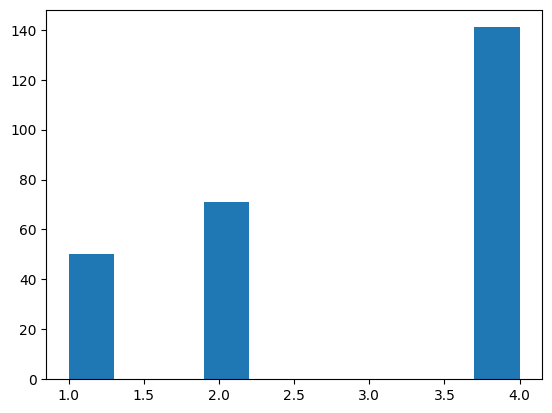

In [38]:
plt.hist(x='SNP_01', data=train)
plt.show()

In [39]:
a = list(train.columns)
a

['trait',
 'SNP_01',
 'SNP_02',
 'SNP_03',
 'SNP_04',
 'SNP_05',
 'SNP_06',
 'SNP_07',
 'SNP_08',
 'SNP_09',
 'SNP_10',
 'SNP_11',
 'SNP_12',
 'SNP_13',
 'SNP_14',
 'SNP_15',
 'class',
 'SNP_01_chrom',
 'SNP_02_chrom',
 'SNP_03_chrom',
 'SNP_04_chrom',
 'SNP_05_chrom',
 'SNP_06_chrom',
 'SNP_07_chrom',
 'SNP_08_chrom',
 'SNP_09_chrom',
 'SNP_10_chrom',
 'SNP_11_chrom',
 'SNP_12_chrom',
 'SNP_13_chrom',
 'SNP_14_chrom',
 'SNP_15_chrom',
 'SNP_01_cm',
 'SNP_02_cm',
 'SNP_03_cm',
 'SNP_04_cm',
 'SNP_05_cm',
 'SNP_06_cm',
 'SNP_07_cm',
 'SNP_08_cm',
 'SNP_09_cm',
 'SNP_10_cm',
 'SNP_11_cm',
 'SNP_12_cm',
 'SNP_13_cm',
 'SNP_14_cm',
 'SNP_15_cm']

In [44]:
pd.get_dummies(train, drop_first=True, dtype='int')

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_06_cm,SNP_07_cm,SNP_08_cm,SNP_09_cm,SNP_10_cm,SNP_11_cm,SNP_12_cm,SNP_13_cm,SNP_14_cm,SNP_15_cm
id,,,,,,,,,,,,,,,,,,,,,
TRAIN_000,2,4,2,1,3,6,1,1,4,1,...,80,80,82,86,62,97,62,63,66,1
TRAIN_001,2,2,2,6,1,1,2,1,3,1,...,80,80,82,86,62,97,62,63,66,1
TRAIN_002,2,4,4,1,3,5,4,1,3,3,...,80,80,82,86,62,97,62,63,66,1
TRAIN_003,1,1,4,1,3,1,4,4,1,4,...,80,80,82,86,62,97,62,63,66,1
TRAIN_004,2,4,4,5,1,5,1,1,1,1,...,80,80,82,86,62,97,62,63,66,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRAIN_257,2,2,2,1,3,5,2,1,3,1,...,80,80,82,86,62,97,62,63,66,1
TRAIN_258,2,4,1,6,1,1,2,3,3,1,...,80,80,82,86,62,97,62,63,66,1
TRAIN_259,1,2,4,1,3,1,2,4,3,3,...,80,80,82,86,62,97,62,63,66,1


In [48]:
print(len(train.columns))

47


In [45]:
from sklearn.model_selection import train_test_split
x_data = train.loc[:,'SNP_01':'SNP_15_cm']
y_data = train.loc[:,'class']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=20)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(209, 46) (209,)
(53, 46) (53,)


In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [42]:
y_knn_pred = knn.predict(x_test)
print("예측값:", y_knn_pred[:5])

예측값: [1 1 0 1 0]


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [49]:
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test, y_knn_pred)
print(f"accuracy:{knn_acc}%")

accuracy:0.9245283018867925%
